# Usage of Network Correspondence Toolbox (NCT)

## Introduction

This notebook demonstrates the usage of the Network Correspondence Toolbox (NCT) for the task of exploring the correspondence between a given data and networks of existing atlases. The toolbox reads in the given data, and compute spatial similarity between the data and the networks of existing atlases. The toolbox also provides visualization of the correspondence between the data and the networks of existing atlases, so that users can easily explore and report the correspondence.

## Installation

The toolbox can be installed using pip:

```
pip install cbig_network_correspondence
```

To update the toolbox, use:

```
pip install cbig_network_correspondence --upgrade
```

## Usage

To use the toolbox, users need to import the toolbox in python:
    
```
import cbig_network_correspondence as cnc
```

The toolbox has two main usage scenarios:

### Input data has a single dimension

Given data with a single dimension, e.g., a single ICA map, a task contrast map, a single network. In this case, user can specify a list of atlases that NCT provided, and the toolbox will compute the spatial similarity between the data and the networks of the atlases. NCT will then perform permulation test (1000 permutations) to test if the given data and the existing networks are significantly overlapped or not. The toolbox will also provide visualization of the correspondence between the data and the networks of the atlases. Specifically, NCT will visualize the results as 1) A network clock map, 2) a set of network radar plots, 3) a summary table of the overlap values and p-values. The summary tables will also be saved as csv files.

### Input data has a multiple dimensions

Given data with multiple dimensions, e.g., a set of ICA maps, a set of task contrast maps, a given atlas with multiple networks. In this case, user can specify a list of atlases that NCT provided, and the toolbox will compute the spatial similarity between the data and the networks of the atlases. NCT will then perform permulation test (1000 permutations) to test if the given data and the existing networks are significantly overlapped or not. The toolbox will also provide visualization of the correspondence between the data and the networks of the atlases. Specifically, NCT will visualize the results as 1) A overlap heatmap, 2) a summary table of the overlap values and p-values. The summary tables will also be saved as csv files.


## Examples

### Example 1: Single dimension data

In this example, I have a single ICA map, and I want to explore the correspondence between the ICA map and the networks of the Gordon2017 17-network atlas (Power2011) and the Glasser2016 atlas with Ji2019 12 Cole-Anticevic networks. I will use the NCT toolbox to compute the spatial similarity between the ICA map and the networks of these two atlases, and visualize the correspondence.

This ICA single map is in FSLMNI2mm space and is located at `/home/rkong/storage/Temporary/NCTexample/ICAdata/thresh_zstat1.nii.gz`.

I then created a config file `ICAconfig`, which contains the following information:

```
[data_info]
Data_Name: ICAexample1
Data_Space: FSLMNI2mm
Data_Type: Soft
Data_Threshold: [0,Inf]
```
In above config file, `Data_Name` is the name of the data, `Data_Space` is the space of the data, `Data_Type` is the type of the data ('Soft','Metric', or 'Hard'), and `Data_Threshold` is the threshold range we used to threshold the data. In this case, my ICA map is a soft parcellation map, so I set `Data_Type` to 'Soft'. It can also be 'Metric'. If the data is a binarized single network map, set `Data_Type` to 'Hard'. I want to keep the data with values greater than 0, so I set `Data_Threshold` to `[0,Inf]`.

The config file is located at `/home/rkong/storage/Temporary/NCTexample/ICAconfig`

Computing overlap with EG17
This is a soft parcellation or metric data.
This is a hard parcellation.
Computing overlap with MG360J12
This is a soft parcellation or metric data.
This is a hard parcellation.
This is a soft parcellation or metric data.
Performing permutation with EG17
This is a soft parcellation or metric data.
This is a hard parcellation.
This is a soft parcellation or metric data.
This is a hard parcellation.
Performing permutation with MG360J12
This is a soft parcellation or metric data.
This is a hard parcellation.
This is a soft parcellation or metric data.
This is a hard parcellation.
Single dimension data is provided. Visualize network correspondence as circular chart.


/home/rkong/storage/miniconda/envs/Ruby_py3/lib/python3.9/site-packages/cbig_network_correspondence/compute_overlap_with_atlases.py:696: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df = pd.concat([df1,df2['name'],df3['p_value']],1)


IndexError: index 0 is out of bounds for axis 0 with size 0

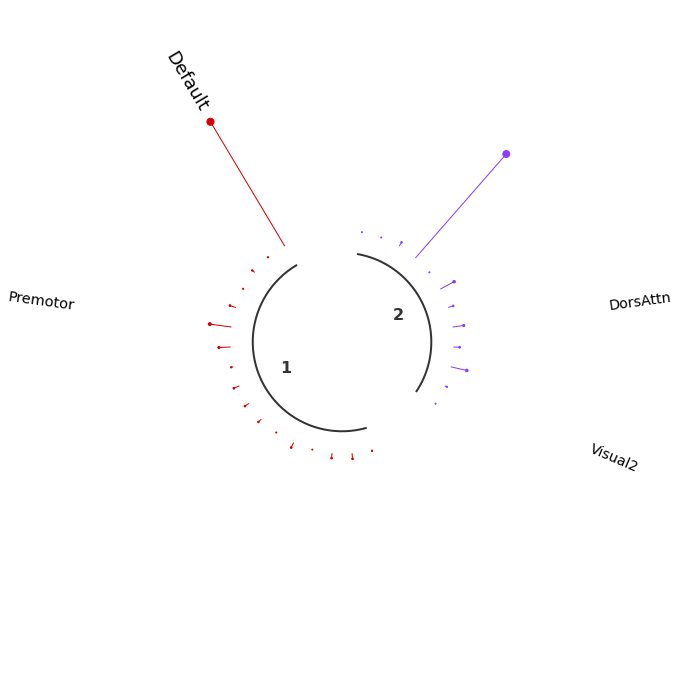

In [3]:
import cbig_network_correspondence as cnc

file_path = '/home/rkong/storage/Temporary/NCTexample/ICAdata/thresh_zstat1.nii.gz'
config = '/home/rkong/storage/Temporary/NCTexample/ICAconfig'
atlas_names_list = ["EG17","MG360J12"]

# construct DataParams object based on the data file path and config
ref_params = cnc.compute_overlap_with_atlases.DataParams(config, file_path)
# compute the overlap with atlases and save the results
cnc.compute_overlap_with_atlases.network_correspondence(ref_params, atlas_names_list,"/home/rkong/storage/Temporary/NCTexample/singleICA_results")





### Example 2: Multi-dimension data

In this example, I have two ICA maps, and I want to explore the correspondence between the ICA maps and the networks of the Gordon2017 17-network atlas (Power2011) and the Glasser2016 atlas with Ji2019 12 Cole-Anticevic networks. I will use the NCT toolbox to compute the spatial similarity between the ICA maps and the networks of these two atlases, and visualize the correspondence.

The ICA maps are in FSLMNI2mm space, and are located at:
+ `/home/rkong/storage/Temporary/NCTexample/ICAdata/thresh_zstat1.nii.gz`
+ `/home/rkong/storage/Temporary/NCTexample/ICAdata/thresh_zstat2.nii.gz`


The config file `ICAconfig_list` contains the following information:

```
[data_info]
Data_Name: ICAmap
Data_Space: FSLMNI2mm
Data_Type: Soft
Data_Threshold: [0,Inf]
```
In above config file, `Data_Name` is the name of the data, `Data_Space` is the space of the data, `Data_Type` is the type of the data ('Soft','Metric', or 'Hard'), and `Data_Threshold` is the threshold range we used to threshold the data. In this case, my ICA map is a soft parcellation map, so I set `Data_Type` to 'Soft'. It can also be 'Metric'. If the data is a binarized single network map, set `Data_Type` to 'Hard'. I want to keep the data with values greater than 0, so I set `Data_Threshold` to `[0,Inf]`.

The config file is located at `/home/rkong/storage/Temporary/NCTexample/ICAconfig_list`

I want to call these two input data as ['net1','net2'].

I can run the following comnannd:

Computing overlap with EG17
This is a soft parcellation or metric data.
This is a hard parcellation.
Computing overlap with MG360J12
This is a soft parcellation or metric data.
This is a hard parcellation.
This is a soft parcellation or metric data.
Performing permutation with EG17
This is a soft parcellation or metric data.
This is a hard parcellation.
This is a soft parcellation or metric data.
This is a hard parcellation.
Performing permutation with MG360J12
This is a soft parcellation or metric data.
This is a hard parcellation.
This is a soft parcellation or metric data.
This is a hard parcellation.
Multiple dimension data are provided. Visualize network correspondence as heatmap.


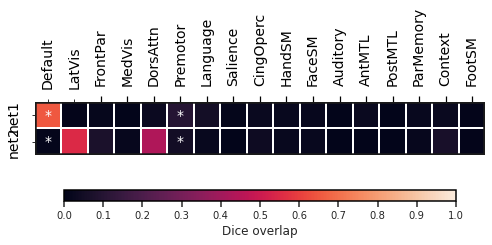

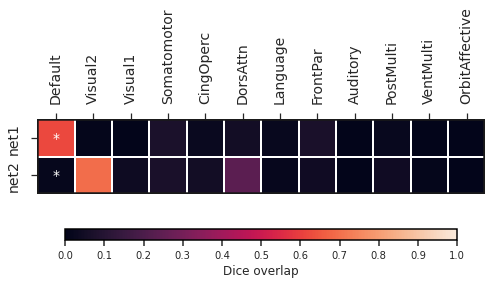

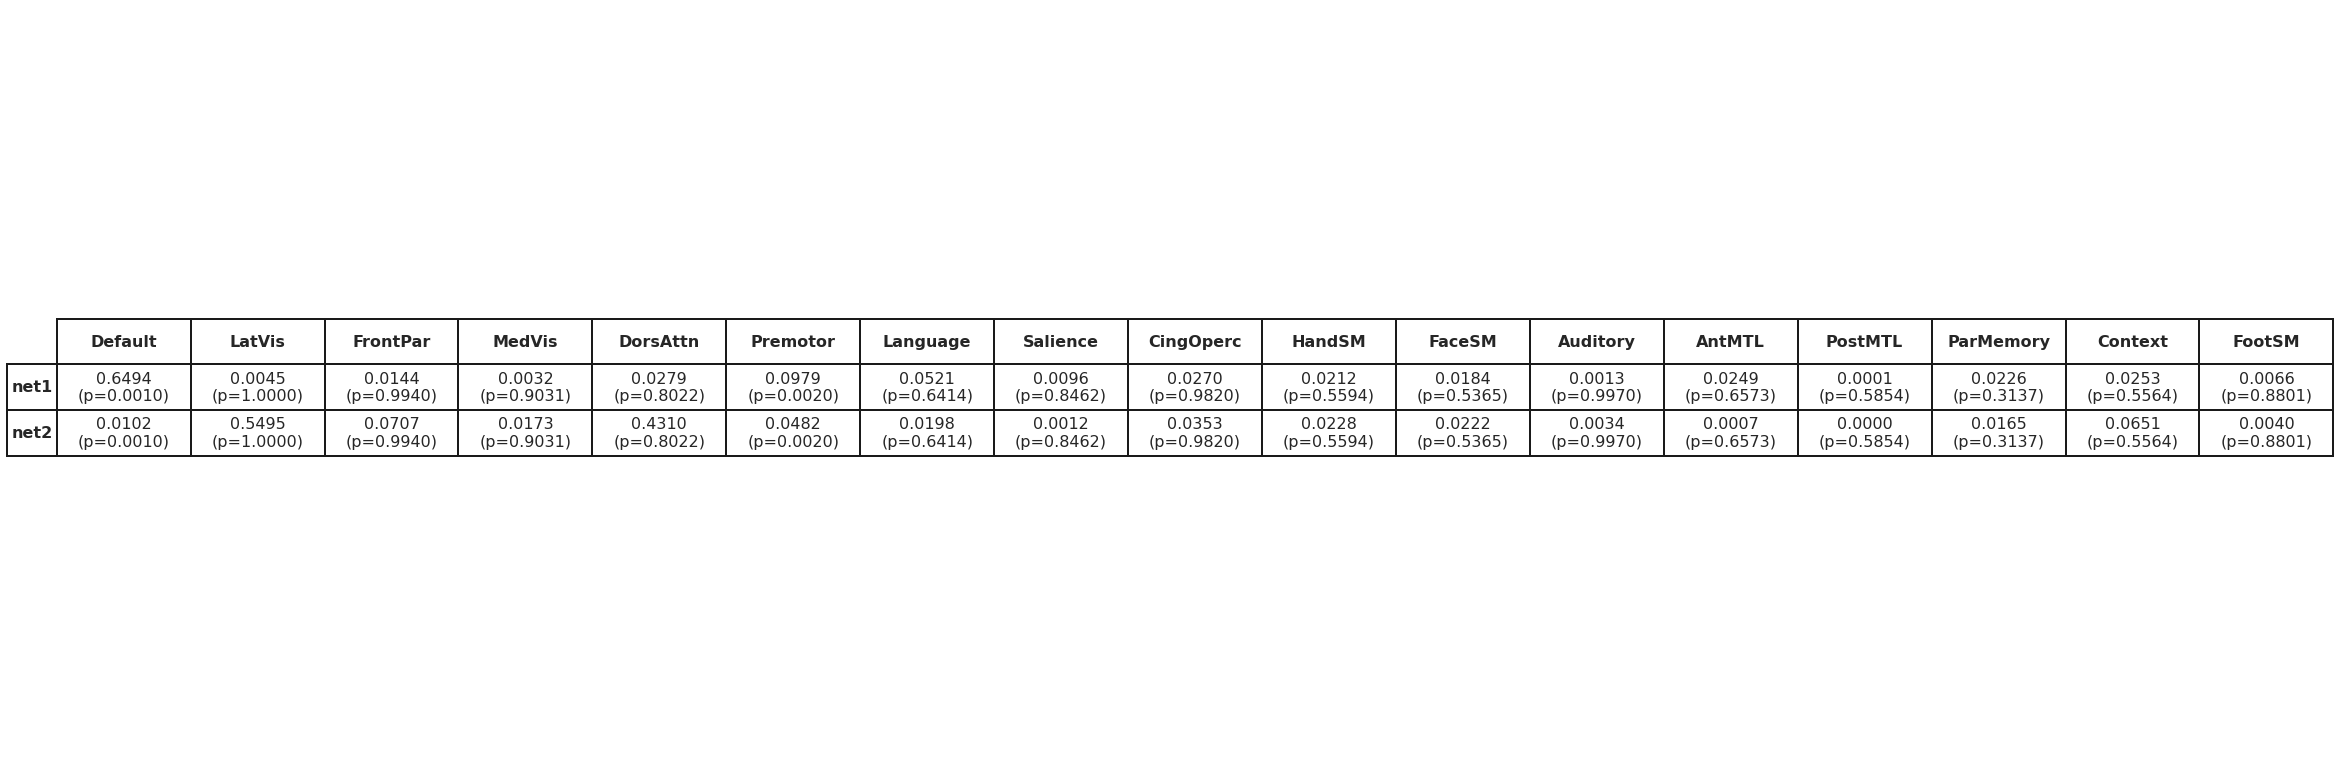

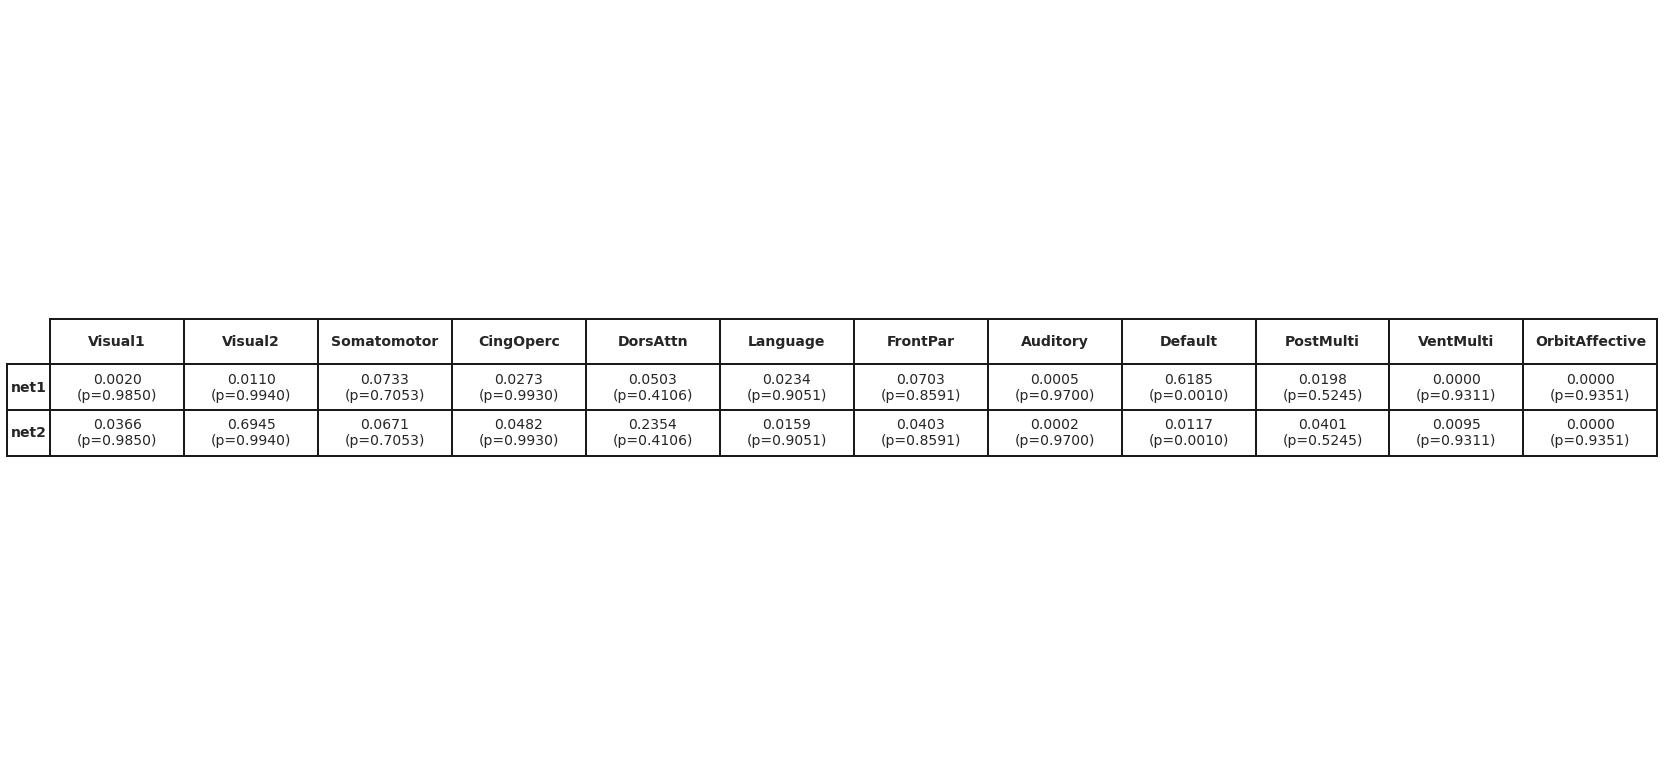

In [4]:
import cbig_network_correspondence as cnc

file_path = ['/home/rkong/storage/Temporary/NCTexample/ICAdata/thresh_zstat1.nii.gz','/home/rkong/storage/Temporary/NCTexample/ICAdata/thresh_zstat2.nii.gz']
config = '/home/rkong/storage/Temporary/NCTexample/ICAconfig_list'
atlas_names_list = ["EG17","MG360J12"]

# construct DataParams object based on the data file path and config
ref_params = cnc.compute_overlap_with_atlases.DataParams(config, file_path)
# compute the overlap with atlases and save the results
cnc.compute_overlap_with_atlases.network_correspondence(ref_params, atlas_names_list,"/home/rkong/storage/Temporary/NCTexample/MultiICA_results1",['net1','net2'])


If the user didn't pass in any reference data names, the name for each data will be set based on the `Data_Name` in the config file. Each data will be named as `Data_Name`+`index`, where `index` is the index of the data in the input data list. In this example, `Data_Name` is `ICAmap`, so the two data will be named as `ICAmap1` and `ICAmap2`.

See the following code for this example:

Computing overlap with EG17
This is a soft parcellation or metric data.
This is a hard parcellation.
Computing overlap with MG360J12
This is a soft parcellation or metric data.
This is a hard parcellation.
This is a soft parcellation or metric data.
Performing permutation with EG17
This is a soft parcellation or metric data.
This is a hard parcellation.
This is a soft parcellation or metric data.
This is a hard parcellation.
Performing permutation with MG360J12
This is a soft parcellation or metric data.
This is a hard parcellation.
This is a soft parcellation or metric data.
This is a hard parcellation.
Multiple dimension data are provided. Visualize network correspondence as heatmap.
ref_networks is not provided. Use ref_input to get the reference network data.


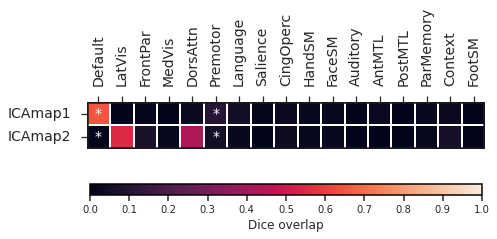

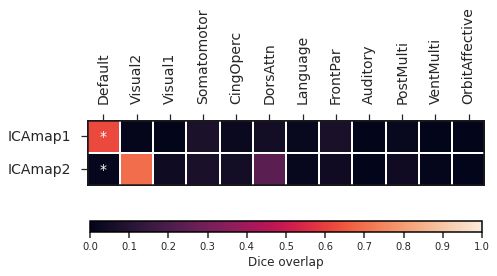

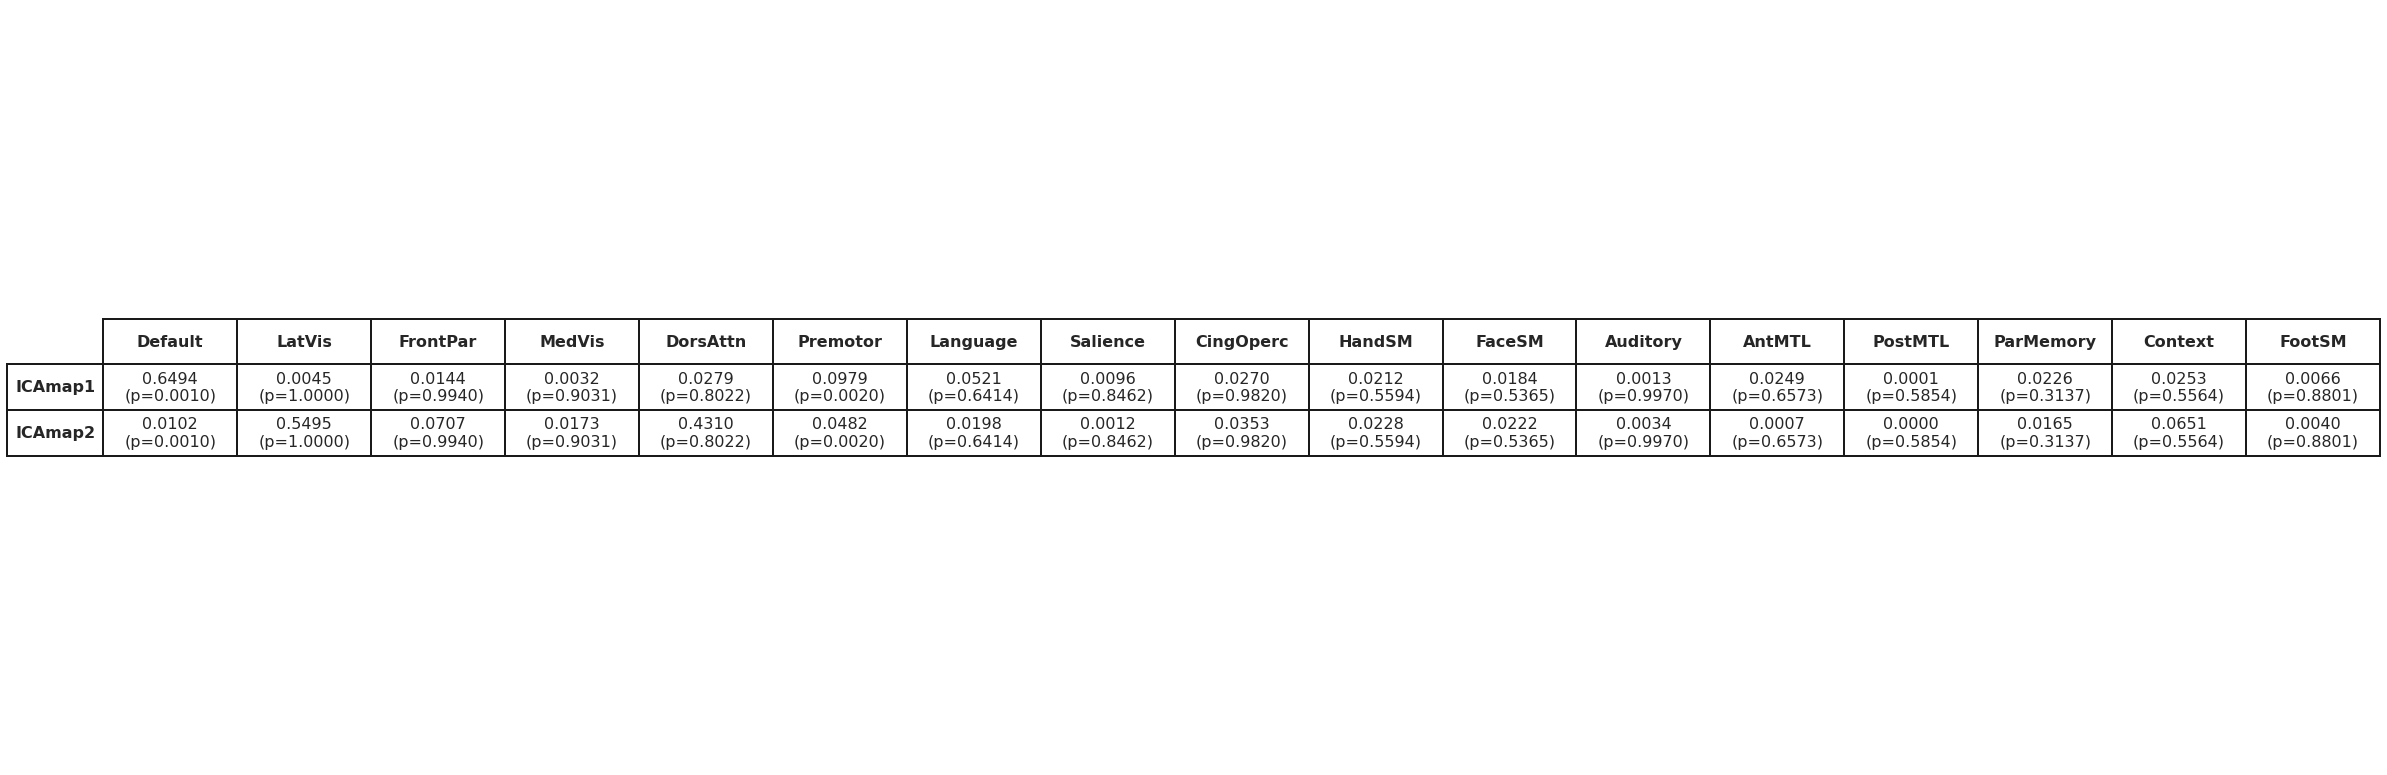

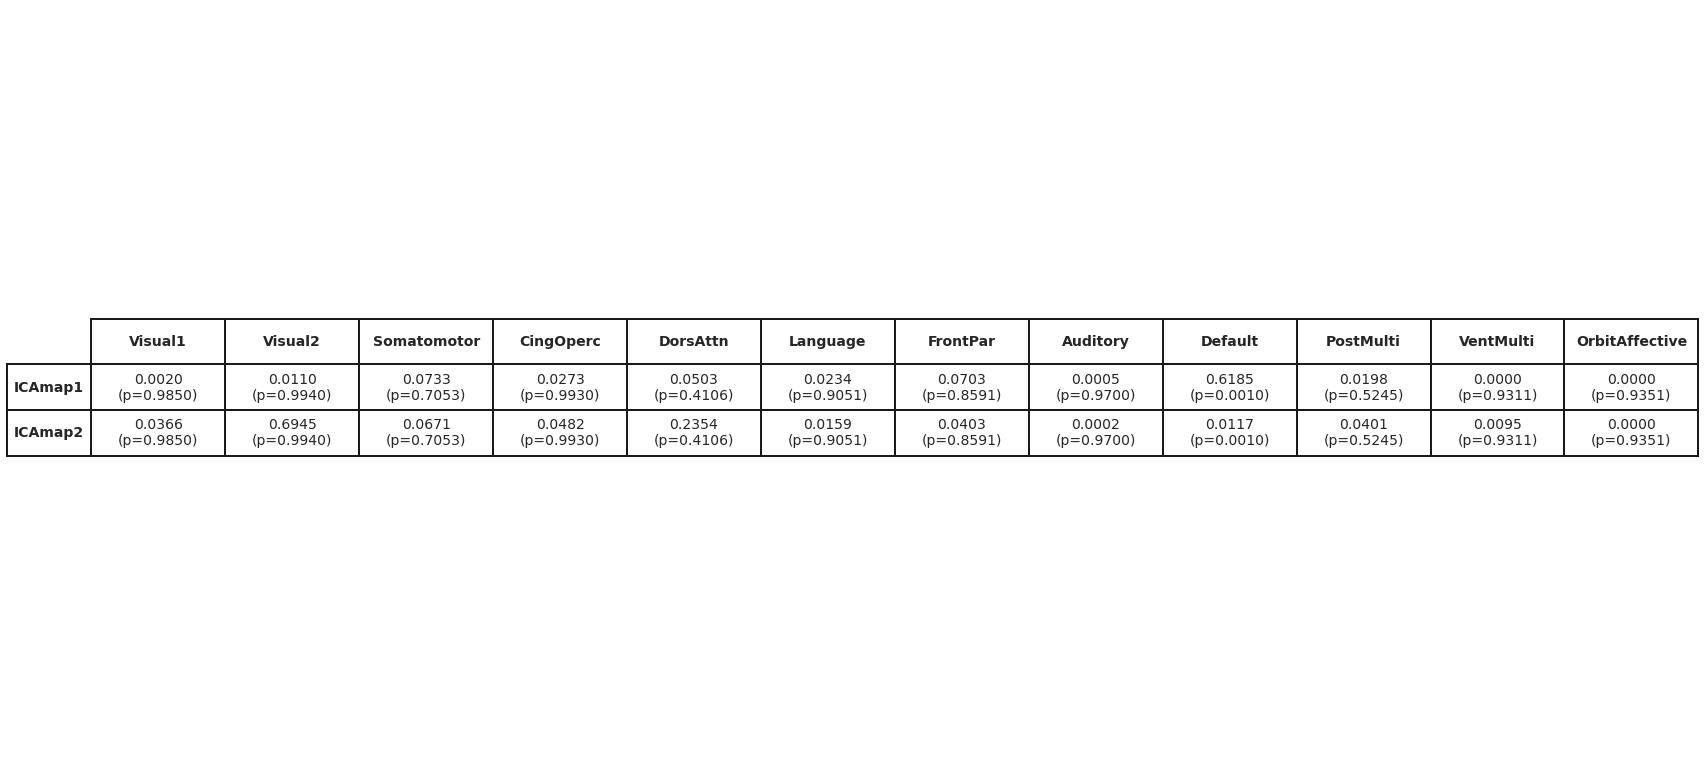

In [5]:
import cbig_network_correspondence as cnc

file_path = ['/home/rkong/storage/Temporary/NCTexample/ICAdata/thresh_zstat1.nii.gz','/home/rkong/storage/Temporary/NCTexample/ICAdata/thresh_zstat2.nii.gz']
config = '/home/rkong/storage/Temporary/NCTexample/ICAconfig_list'
atlas_names_list = ["EG17","MG360J12"]

# construct DataParams object based on the data file path and config
ref_params = cnc.compute_overlap_with_atlases.DataParams(config, file_path)
# compute the overlap with atlases and save the results
cnc.compute_overlap_with_atlases.network_correspondence(ref_params, atlas_names_list,"/home/rkong/storage/Temporary/NCTexample/MultiICA_results2")


There is another usage scenario, where the user doesn't need to specify the input data files as a list, instead, the user can specify the input data file path as a directory. The toolbox will extract the input data files from the directory based on `Data_Name` in the config file. Specifically, in this example, the input data file names are `thresh_zstat1.nii.gz` and `thresh_zstat2.nii.gz`. Therefore, the `Data_Name` can be set as `thresh_zstat` or `thresh`  or `zstat` in the config file. NCT will find all the files whose names contain `Data_Name` in the directory and use them as input data files. Here, we set `Data_Name` as `thresh_zstat` in the config file.

The config file `ICAconfig2` contains the following information:

```
[data_info]
Data_Name: thresh_zstat
Data_Space: FSLMNI2mm
Data_Type: Soft
Data_Threshold: [0,Inf]
```
If the user didn't pass in any reference data names, the name for each data will be set based on the `Data_Name` in the config file. Each data will be named as `Data_Name`+`index`, where `index` is the index of the data in the input data list. In this example, `Data_Name` is `thresh_zstat`, so the two data will be named as `thresh_zstat1` and `thresh_zstat2`.

Computing overlap with EG17
This is a soft parcellation or metric data.
This is a hard parcellation.
Computing overlap with MG360J12
This is a soft parcellation or metric data.
This is a hard parcellation.
This is a soft parcellation or metric data.
Performing permutation with EG17
This is a soft parcellation or metric data.
This is a hard parcellation.
This is a soft parcellation or metric data.
This is a hard parcellation.
Performing permutation with MG360J12
This is a soft parcellation or metric data.
This is a hard parcellation.
This is a soft parcellation or metric data.
This is a hard parcellation.
Multiple dimension data are provided. Visualize network correspondence as heatmap.
ref_networks is not provided. Use ref_input to get the reference network data.


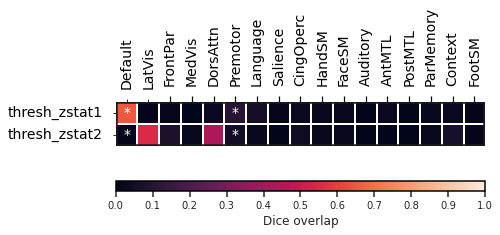

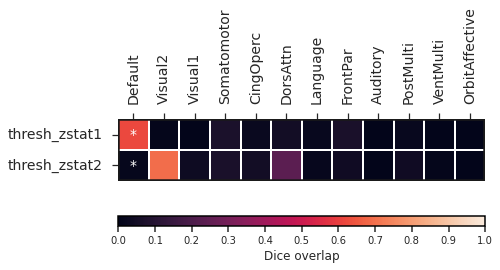

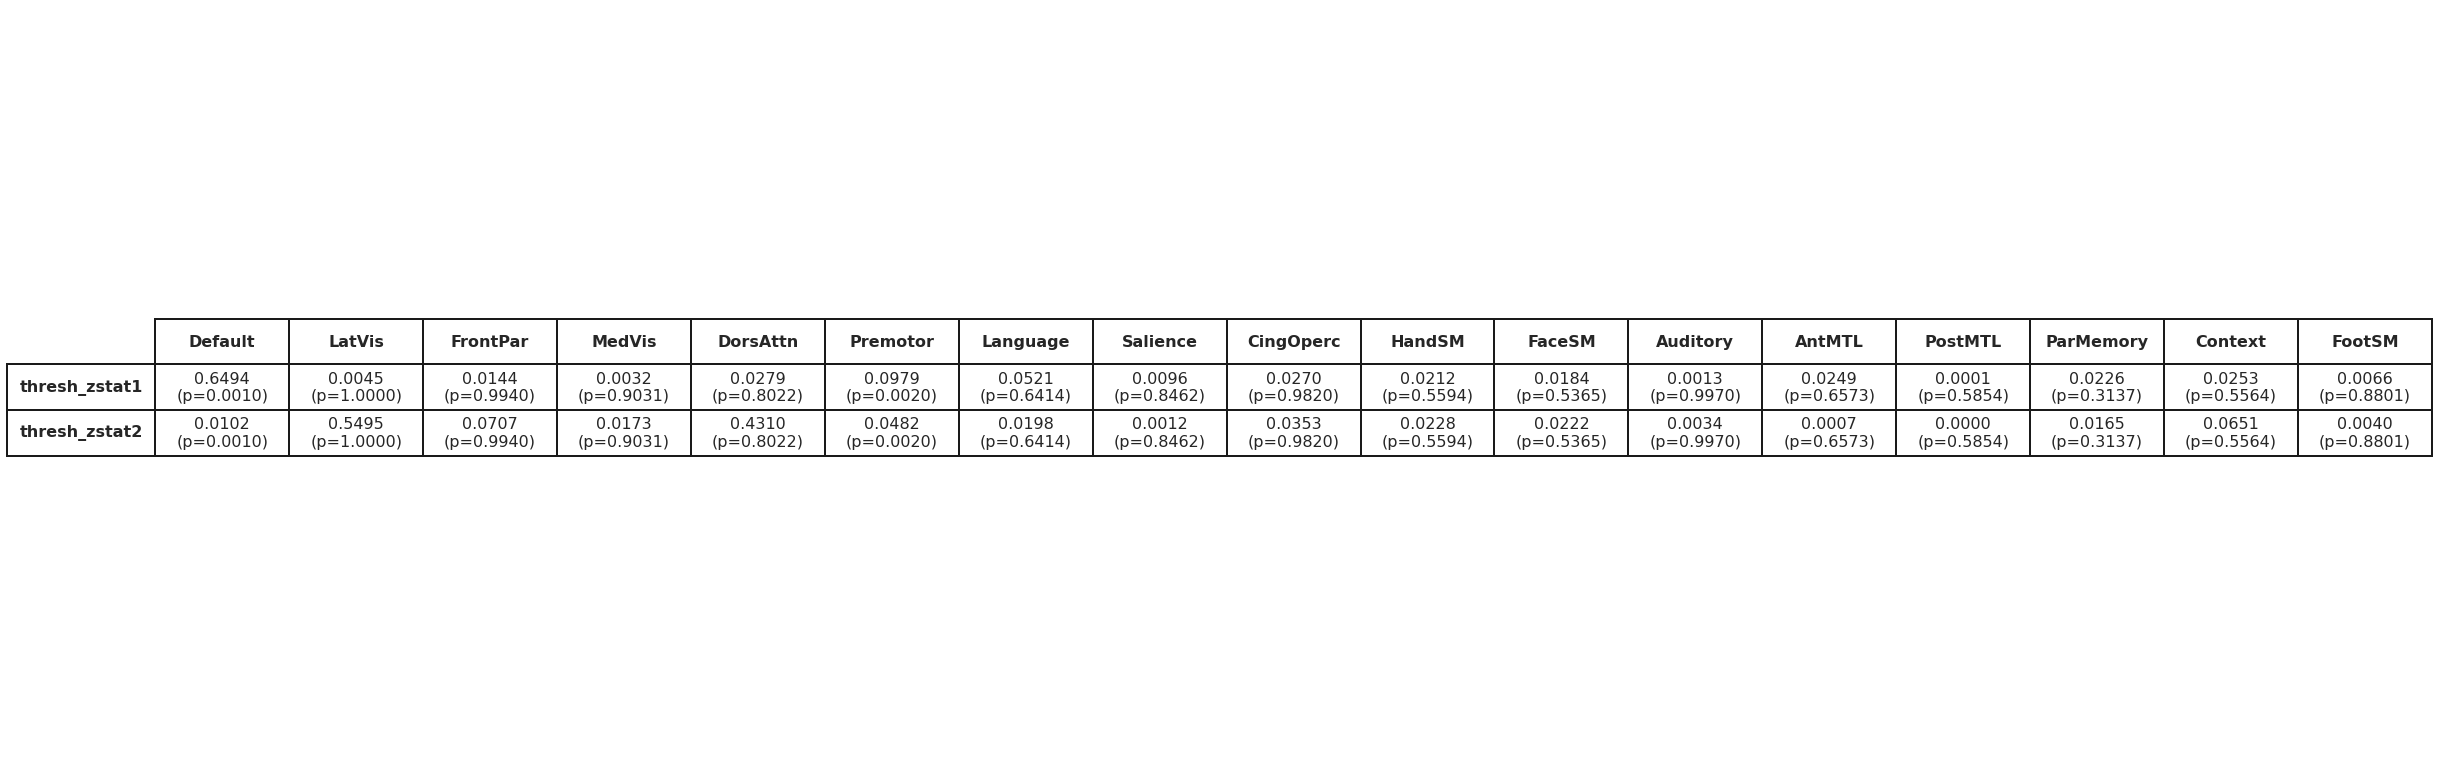

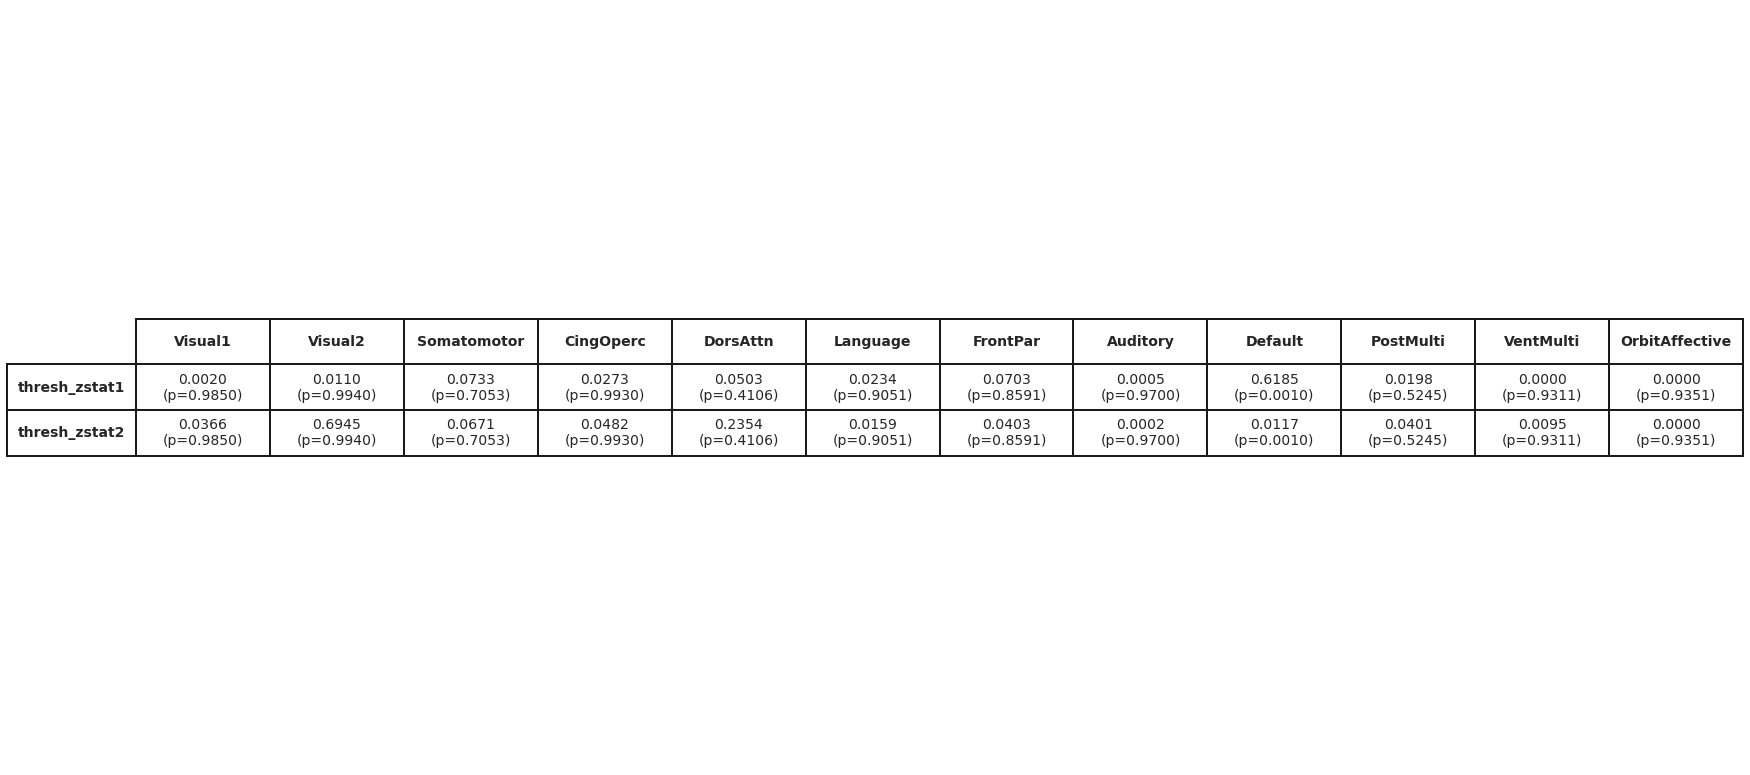

In [3]:
import cbig_network_correspondence as cnc

file_path = '/home/rkong/storage/Temporary/NCTexample/ICAdata'
config = '/home/rkong/storage/Temporary/NCTexample/ICAconfig2'
atlas_names_list = ["EG17","MG360J12"]

# construct DataParams object based on the data file path and config
ref_params = cnc.compute_overlap_with_atlases.DataParams(config, file_path)
# compute the overlap with atlases and save the results
cnc.compute_overlap_with_atlases.network_correspondence(ref_params, atlas_names_list,"/home/rkong/storage/Temporary/NCTexample/MultiICA_results3")


## Example 3: Exploring network correspondence between existing atlases

In this example, I want to explore the correspondence between the networks of Yeo2011 17-network atlas and the networks of the Gordon2017 17-network atlas (Power2011) and the Glasser2016 atlas with Ji2019 12 Cole-Anticevic networks. I will use the NCT toolbox to compute the spatial similarity between the networks of the Yeo2011 atlas and the networks of the Gordon2017 and Glasser2016 atlases, and visualize the correspondence.

Since the networks of the Yeo2011 atlas are already defined, I don't need to provide any input data or specify any config file. I only need to specify the name of the Yeo2011 atlas `TY17`, and provide the list of other atlases that I want to compare with the Yeo2011 atlas. 

Note that Yeo2011 atlas is also a multi-dimensional input data, so the toolbox will use a network heatmap to visualize the correspondence between the networks of the Yeo2011 atlas and the networks of the Gordon2017 and Glasser2016 atlases.

Computing overlap with EG17
This is a hard parcellation.
This is a hard parcellation.
Computing overlap with MG360J12
This is a hard parcellation.
This is a hard parcellation.
Performing permutation with EG17
This is a hard parcellation.
This is a hard parcellation.
This is a hard parcellation.
This is a hard parcellation.
Performing permutation with MG360J12
This is a hard parcellation.
This is a hard parcellation.
This is a hard parcellation.
This is a hard parcellation.
Multiple dimension data are provided. Visualize network correspondence as heatmap.
ref_networks is not provided. Use ref_input to get the reference network data.


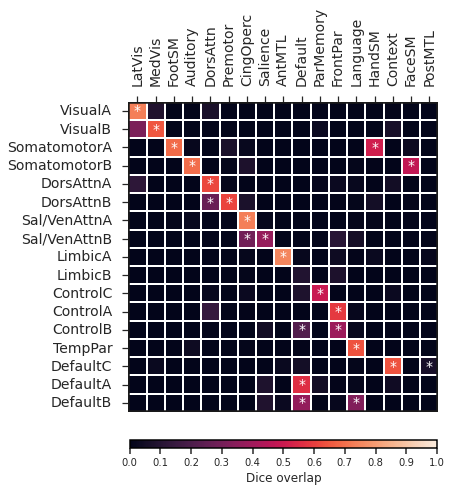

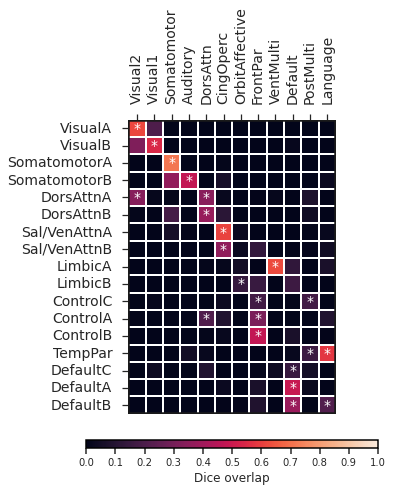

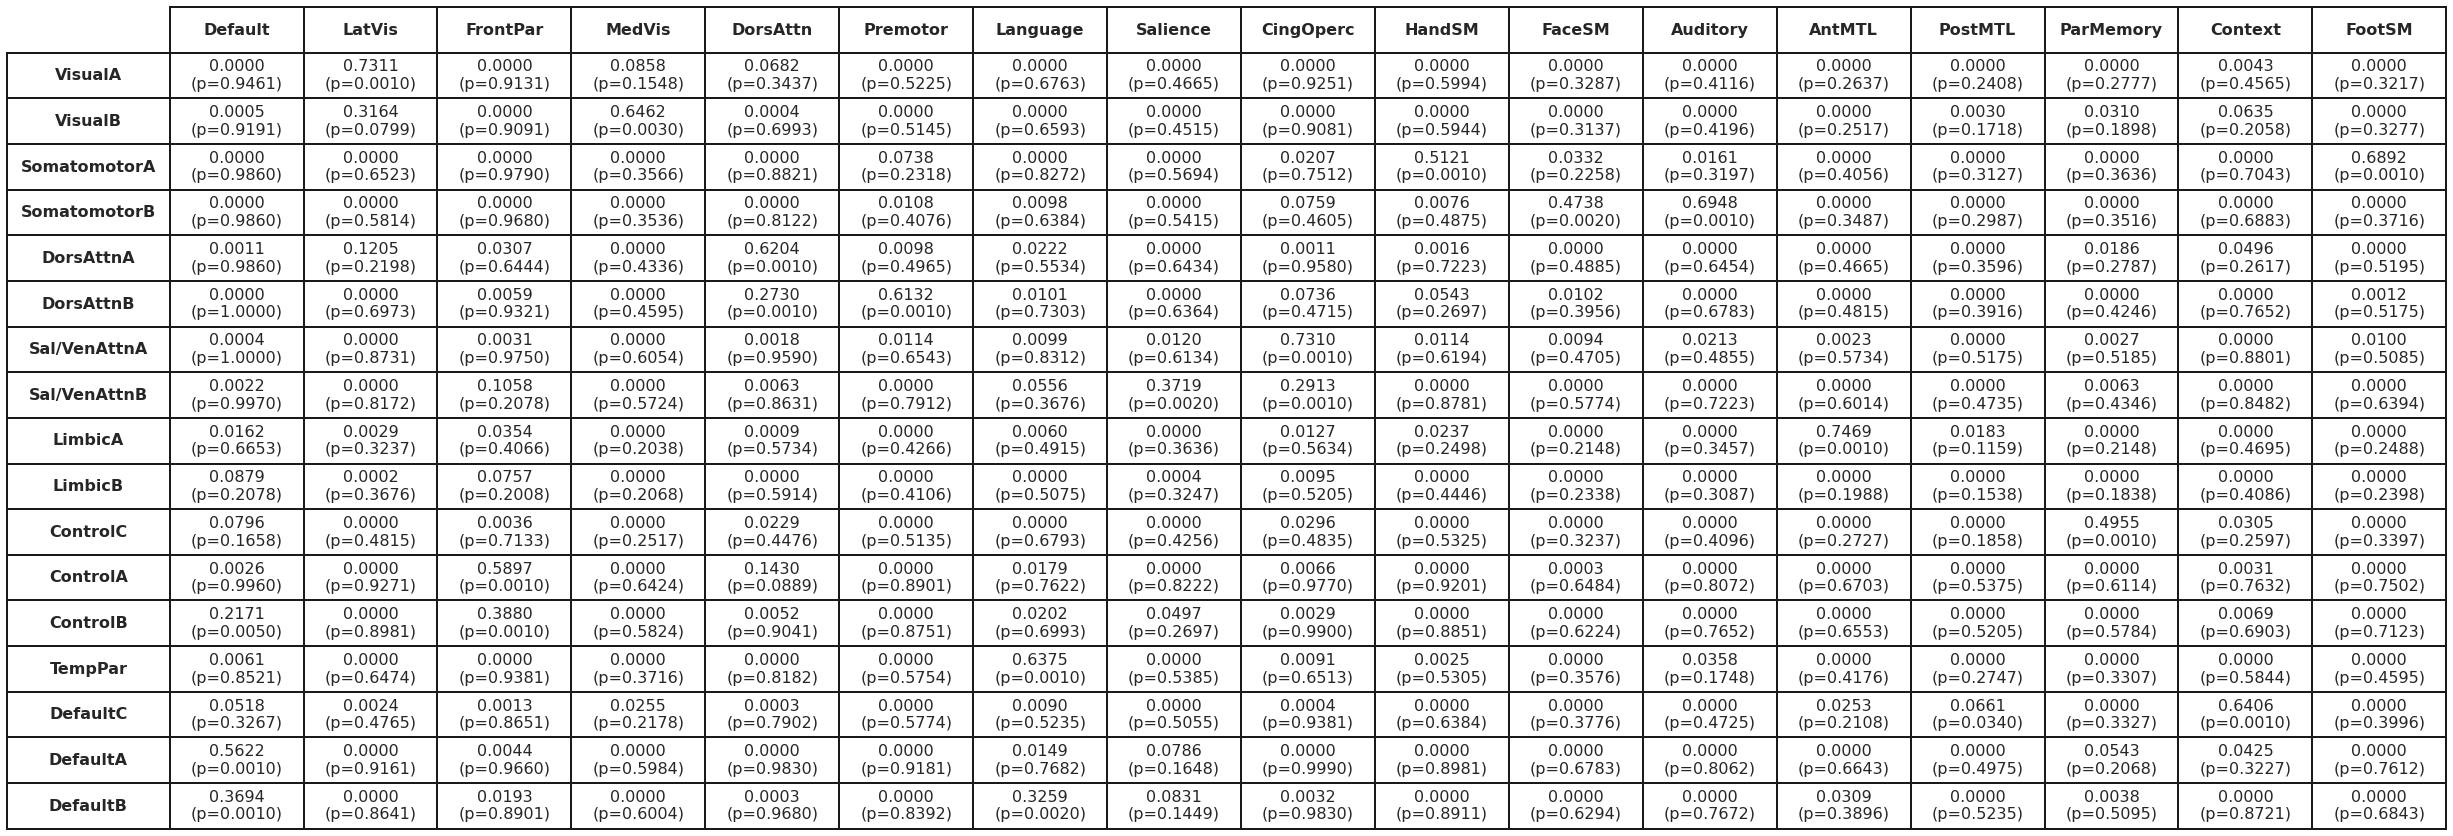

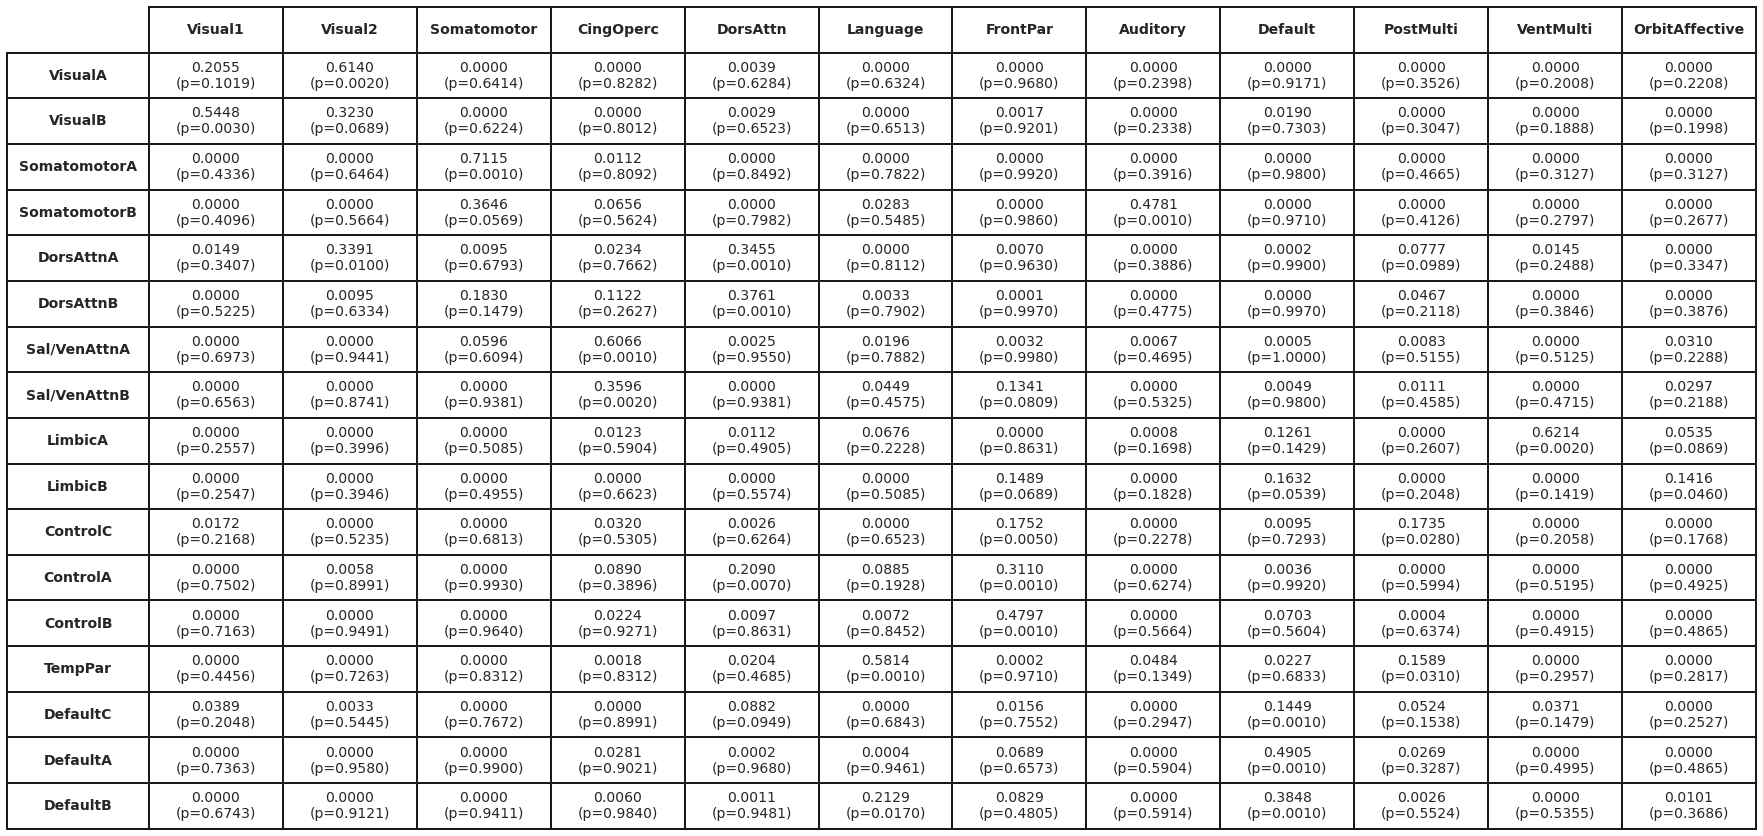

In [7]:
import cbig_network_correspondence as cnc

atlas_names_list = ["EG17","MG360J12"]
cnc.compute_overlap_with_atlases.network_correspondence("TY17", atlas_names_list,"/home/rkong/storage/Temporary/NCTexample/atlas_results")


## Try with our example data!

/home/rkong/storage/miniconda/envs/Ruby_py3/lib/python3.9/site-packages/cbig_network_correspondence/data/examples/Exemplar1_pos
/home/rkong/storage/miniconda/envs/Ruby_py3/lib/python3.9/site-packages/cbig_network_correspondence/data/examples/Exemplar1.nii.gz
Computing overlap with EG17
This is a soft parcellation or metric data.
This is a hard parcellation.
Computing overlap with MG360J12
This is a soft parcellation or metric data.
This is a hard parcellation.
This is a soft parcellation or metric data.
Performing permutation with EG17
This is a soft parcellation or metric data.
This is a hard parcellation.
This is a soft parcellation or metric data.
This is a hard parcellation.
Performing permutation with MG360J12
This is a soft parcellation or metric data.
This is a hard parcellation.
This is a soft parcellation or metric data.
This is a hard parcellation.
Single dimension data is provided. Visualize network correspondence as circular chart.


/home/rkong/storage/miniconda/envs/Ruby_py3/lib/python3.9/site-packages/cbig_network_correspondence/compute_overlap_with_atlases.py:696: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df = pd.concat([df1,df2['name'],df3['p_value']],1)
/home/rkong/storage/miniconda/envs/Ruby_py3/lib/python3.9/site-packages/cbig_network_correspondence/visualize_report_lib.py:460: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df_all = pd.concat([df_all,df_curr],1)


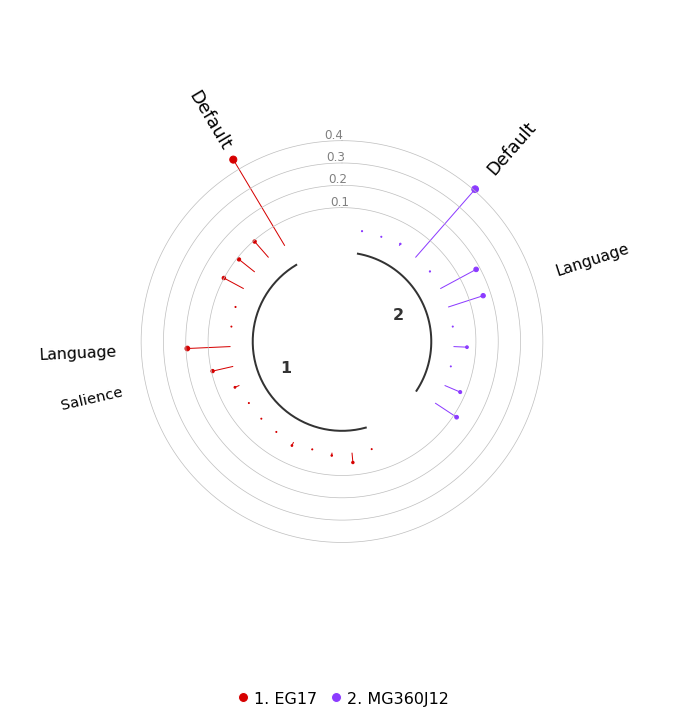

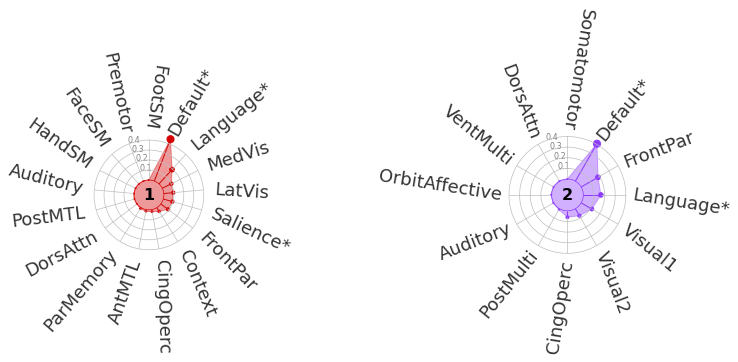

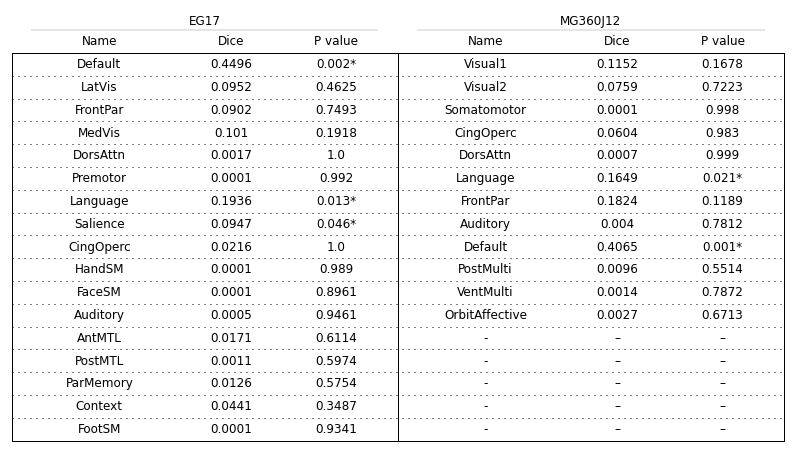

In [2]:
import cbig_network_correspondence as cnc

atlas_names_list = ["EG17","MG360J12"]
example = cnc.load_example
# the example config file
print(example.example_config)
# the path to the example data
print(example.example_nii)
ref_params = cnc.compute_overlap_with_atlases.DataParams(example.example_config, example.example_nii)
cnc.compute_overlap_with_atlases.network_correspondence(ref_params, atlas_names_list,"/home/rkong/storage/Temporary/NCTexample/example_results")

